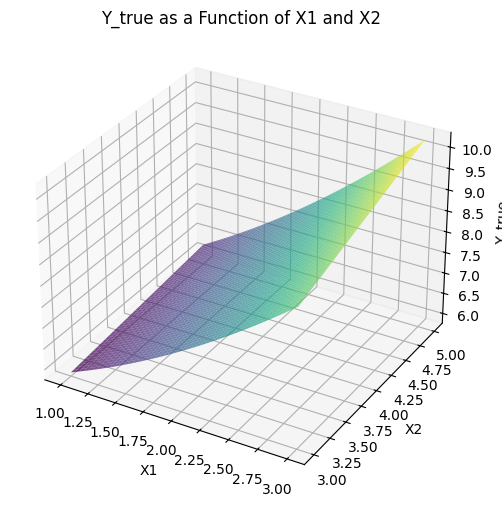

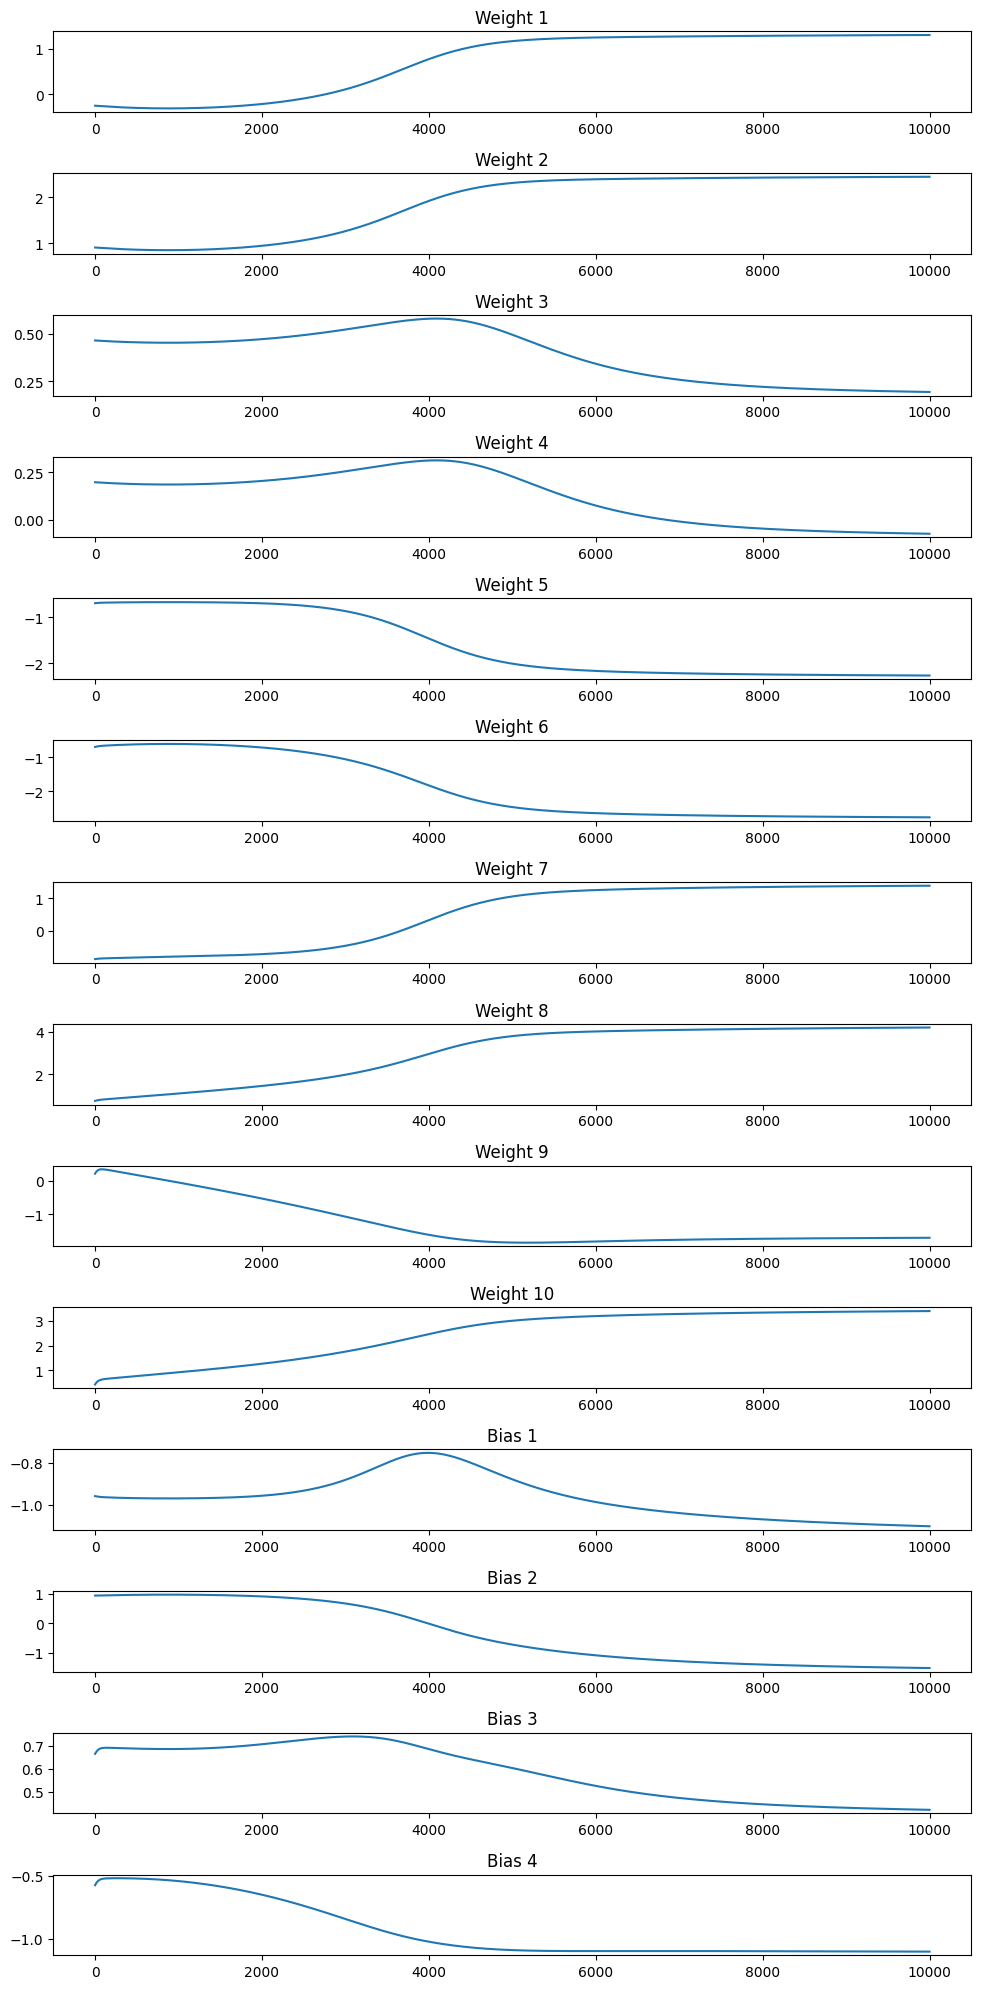

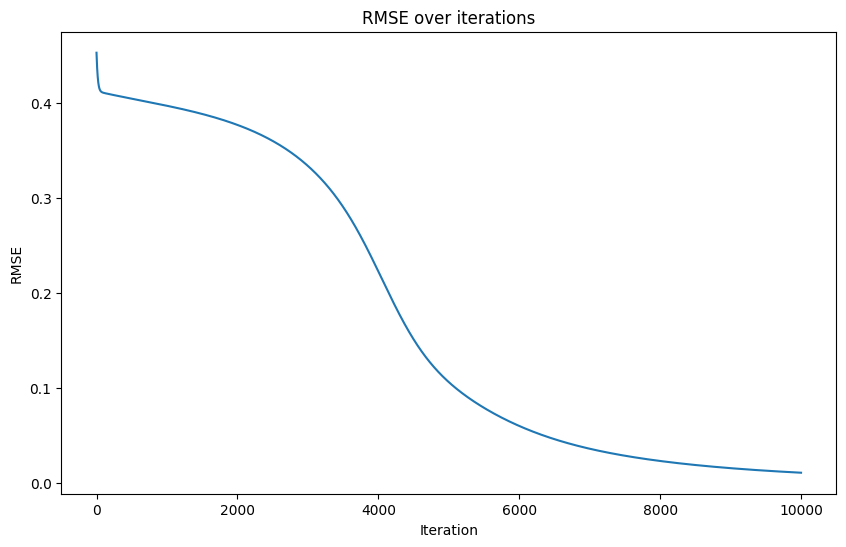

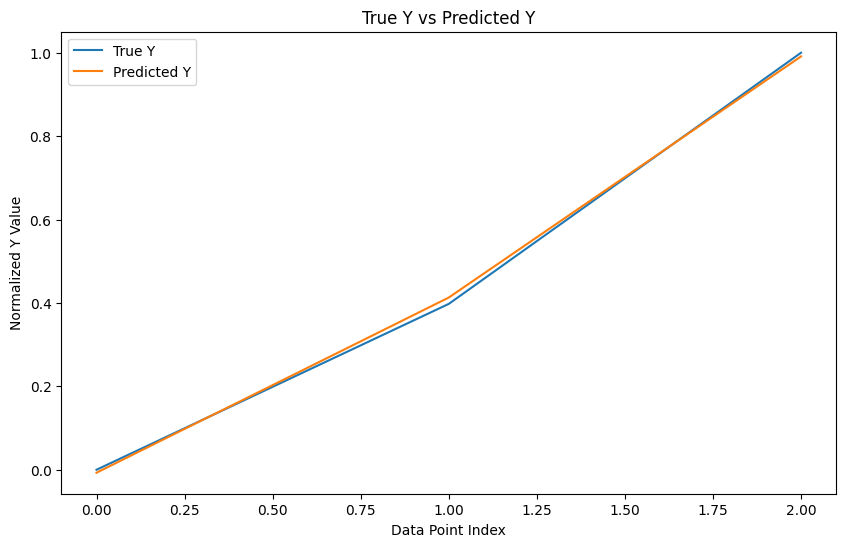

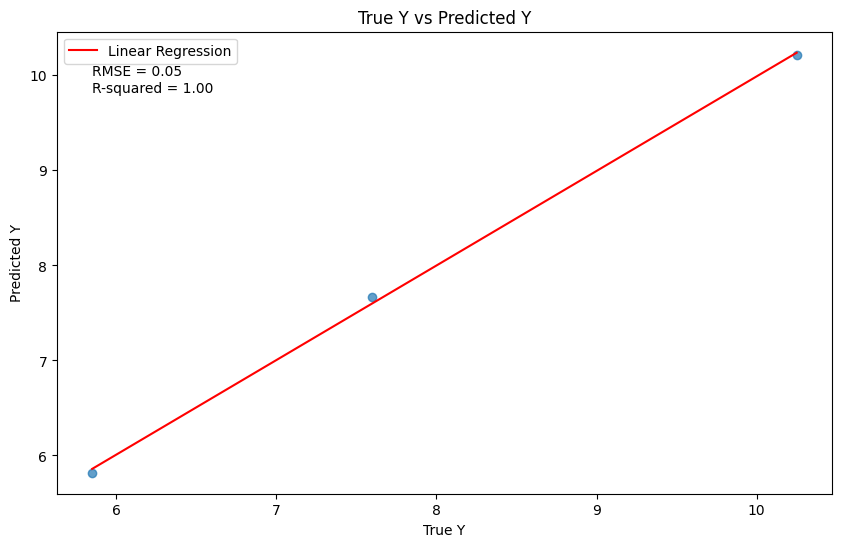

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Min-Max normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Initialize input data and true labels
X1 = np.array([1, 2, 3])
X2 = np.array([3, 4, 5])
# Generate Y_true using the specified function
def generate_y_true(X1, X2):
    return 0.25 * X1**2 + 0.2 * X1 * X2 + 5
Y_true = generate_y_true(X1, X2)
## Plot model of Y_true Generate data points for the 3D plot
X1_plot = np.linspace(np.min(X1), np.max(X1), 100)
X2_plot = np.linspace(np.min(X2), np.max(X2), 100)
X1_plot, X2_plot = np.meshgrid(X1_plot, X2_plot)
Y_true_plot = generate_y_true(X1_plot, X2_plot)

# Plotting Y_true as a function of X1 and X2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_plot, X2_plot, Y_true_plot, cmap='viridis', alpha=0.7)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y_true')
ax.set_title('Y_true as a Function of X1 and X2')

plt.show()



# Normalize inputs and outputs
X1_normalized = normalize(X1)
X2_normalized = normalize(X2)
Y_true_normalized = normalize(Y_true)

# Initialize weights and biases
np.random.seed(42)
W11, W21, W12, W22 = 2 * np.random.rand(4) - 1
W31, W41, W32, W42 = 2 * np.random.rand(4) - 1
W51, W52 = 2 * np.random.rand(2) - 1
b1, b2, b3, b4 = 2 * np.random.rand(4) - 1

# Hyperparameters
learning_rate = 0.1
epochs = 10000

# Lists to store weights for visualization
weights = [W11, W21, W12, W22, W31, W41, W32, W42, W51, W52]
biases = [b1, b2, b3, b4]

# Lists to store weight and bias histories for visualization
weights_history = [[] for _ in range(len(weights))]
biases_history = [[] for _ in range(len(biases))]

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)
rmse_history = []
# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward pass
    A11 = sigmoid(X1_normalized * W11 + X2_normalized * W12 + b1)
    A12 = sigmoid(X1_normalized * W21 + X2_normalized * W22 + b2)
    A21 = sigmoid(A11 * W31 + A12 * W32 + b3)
    A22 = sigmoid(A11 * W41 + A12 * W42 + b4)
    Y_pred = A21 * W51 + A22 *W52

    # Calculate the loss
    loss = (1/2)*np.mean((Y_pred - Y_true_normalized)**2)

    # Backward pass
    d_loss = (Y_pred - Y_true_normalized) / len(Y_true_normalized)
    d_W51 = A21 * d_loss
    d_W52 = A22 * d_loss

    d_A21 = W51 * d_loss
    d_A22 = W52 * d_loss

    d_A11 = W31 * sigmoid_derivative(A11) * d_A21
    d_A12 = W41 * sigmoid_derivative(A12) * d_A21

    d_W11 = X1_normalized * sigmoid_derivative(A11) * d_A11
    d_W21 = X2_normalized * sigmoid_derivative(A11) * d_A11
    d_b1 = sigmoid_derivative(A11) * d_A11

    d_W12 = X1_normalized * sigmoid_derivative(A12) * d_A12
    d_W22 = X2_normalized * sigmoid_derivative(A12) * d_A12
    d_b2 = sigmoid_derivative(A12) * d_A12

    d_W31 = A11 * sigmoid_derivative(A21) * d_A21
    d_W41 = A12 * sigmoid_derivative(A21) * d_A21
    d_b3 = sigmoid_derivative(A21) * d_A21

    d_W32 = A11 * sigmoid_derivative(A22) * d_A22
    d_W42 = A12 * sigmoid_derivative(A22) * d_A22
    d_b4 = sigmoid_derivative(A22) * d_A22

    # Update weights and biases
    W51 -= learning_rate * np.sum(d_W51)
    W52 -= learning_rate * np.sum(d_W52)

    W11 -= learning_rate * np.sum(d_W11)
    W21 -= learning_rate * np.sum(d_W21)
    b1 -= learning_rate * np.sum(d_b1)

    W12 -= learning_rate * np.sum(d_W12)
    W22 -= learning_rate * np.sum(d_W22)
    b2 -= learning_rate * np.sum(d_b2)

    W31 -= learning_rate * np.sum(d_W31)
    W41 -= learning_rate * np.sum(d_W41)
    b3 -= learning_rate * np.sum(d_b3)

    W32 -= learning_rate * np.sum(d_W32)
    W42 -= learning_rate * np.sum(d_W42)
    b4 -= learning_rate * np.sum(d_b4)

 # Calculate the RMSE
    rmse = np.sqrt(np.mean((Y_pred - Y_true_normalized)**2))
    rmse_history.append(rmse)

    # ... (rest of your code)



    # Update the weights list
    weights = [W11, W21, W12, W22, W31, W41, W32, W42, W51, W52]
    # Update the biases list
    biases = [b1, b2, b3, b4]
    # Append weights and biases for visualization
    for i, weight in enumerate(weights):
        weights_history[i].append(weight)

    for i, bias in enumerate(biases):
        biases_history[i].append(bias)

# Plotting the weights over iterations
fig, axes = plt.subplots(len(weights_history) + len(biases_history), 1, figsize=(10, 20))

for i, weight_history in enumerate(weights_history):
    axes[i].plot(weight_history)
    axes[i].set_title(f'Weight {i+1}')

for i, bias_history in enumerate(biases_history):
    axes[len(weights_history) + i].plot(bias_history)
    axes[len(weights_history) + i].set_title(f'Bias {i+1}')

plt.tight_layout()
plt.show()


# Plotting the RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(rmse_history)
plt.title('RMSE over iterations')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()


# Plotting the predicted Y values against the true Y values
plt.figure(figsize=(10, 6))
plt.plot(Y_true_normalized, label='True Y')
plt.plot(Y_pred, label='Predicted Y')
plt.title('True Y vs Predicted Y')
plt.xlabel('Data Point Index')
plt.ylabel('Normalized Y Value')
plt.legend()
plt.show()

# Denormalize function
def denormalize(data_normalized, data):
    return data_normalized * (np.max(data) - np.min(data)) + np.min(data)

# Denormalize Y_pred
Y_pred_denormalized = denormalize(Y_pred, Y_true)


from sklearn.metrics import r2_score

# Calculate RMSE and R-squared
rmse = np.sqrt(np.mean((Y_pred_denormalized - Y_true)**2))
r2 = r2_score(Y_true, Y_pred_denormalized)
# Fit a line to the data
slope, intercept = np.polyfit(Y_true, Y_pred_denormalized, 1)

# Generate x values for the line
x_line = np.linspace(min(Y_true), max(Y_true), 100)

# Generate corresponding y values for the line
y_line = slope * x_line + intercept

# Scatter plot of the non-normalized predicted Y values against the true Y values
plt.figure(figsize=(10, 6))
plt.scatter(Y_true, Y_pred_denormalized, alpha=0.7)
plt.plot(x_line, y_line, color='red', label='Linear Regression')  # Add the regression line
plt.title('True Y vs Predicted Y')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')

# Add RMSE and R-squared to the plot
plt.text(min(Y_true), max(Y_pred_denormalized) - 0.1, f'RMSE = {rmse:.2f}\nR-squared = {r2:.2f}', verticalalignment='top')

plt.legend()  # Add a legend
plt.show()


In [12]:
A11 = sigmoid(X1_normalized * W11 + X2_normalized * W12 + b1)
A12 = sigmoid(X1_normalized * W21 + X2_normalized * W22 + b2)
A21 = sigmoid(A11 * W31 + A12 * W32 + b3)
A22 = sigmoid(A11 * W41 + A12 * W42 + b4)
Y_pred = A21 * W51 + A22 *W52

In [13]:
A11

array([0.27711231, 0.29895124, 0.32174525])

In [14]:
A12

array([0.71906324, 0.81595704, 0.8847871 ])

In [15]:
A21

array([0.45976486, 0.43488402, 0.41618184])

In [16]:
A22

array([0.44044149, 0.45426928, 0.46289082])

In [17]:
X1_normalized * W11 + X2_normalized * W12 + b1

array([-0.95883101, -0.85229695, -0.74576289])

In [18]:
X1_normalized * W21 + X2_normalized * W22 + b2

array([0.9398197 , 1.48919249, 2.03856529])

In [19]:
A11 * W31 + A12 * W32 + b3

array([-0.16128931, -0.2619516 , -0.33846729])

In [20]:
A11 * W41 + A12 * W42 + b4

array([-0.23937047, -0.1834355 , -0.14871018])

In [6]:

# Initialize weights and biases
np.random.seed(42)
W11, W21, W12, W22 = 2 * np.random.rand(4) - 1
W31, W41, W32, W42 = 2 * np.random.rand(4) - 1
W51, W52 = 2 * np.random.rand(2) - 1
b1, b2, b3, b4 = 2 * np.random.rand(4) - 1

In [7]:
W11, W21, W12, W22, W31, W41, W32, W42, W51, W52, b1, b2, b3, b4

(-0.250919762305275,
 0.9014286128198323,
 0.4639878836228102,
 0.1973169683940732,
 -0.687962719115127,
 -0.6880109593275947,
 -0.8838327756636011,
 0.7323522915498704,
 0.2022300234864176,
 0.416145155592091,
 -0.9588310114083951,
 0.9398197043239886,
 0.6648852816008435,
 -0.5753217786434477)

In [11]:
A11

array([0.24292428, 0.40350751, 0.58782237])

In [21]:
A11 * W31 + A12 * W32 + b3


array([0.27626585, 0.27698857, 0.27679423])

In [ ]:
A11 = sigmoid(X1_normalized * W11 + X2_normalized * W12 + b1)
A12 = sigmoid(X1_normalized * W21 + X2_normalized * W22 + b2)
A21 = sigmoid(A11 * W31 + A12 * W32 + b3)
A22 = sigmoid(A11 * W41 + A12 * W42 + b4)
Y_pred = A21 * W51 + A22 *W52

In [22]:
X1_normalized * W11 + X2_normalized * W12 + b1

array([-0.95883101, -0.85229695, -0.74576289])

In [23]:
X1_normalized * W21 + X2_normalized * W22 + b2


array([0.9398197 , 1.48919249, 2.03856529])

In [25]:
A12

array([0.71906324, 0.81595704, 0.8847871 ])

In [26]:
A11 * W31 + A12 * W32 + b3

array([-0.16128931, -0.2619516 , -0.33846729])

In [29]:
A22 = sigmoid(A11 * W41 + A12 * W42 + b4)
A21

array([0.45976486, 0.43488402, 0.41618184])

In [30]:
Y_pred

array([0.27626585, 0.27698857, 0.27679423])

In [34]:
  # Calculate the loss
loss = np.mean((Y_pred - Y_true_normalized)**2)
loss

0.00012057217964343843

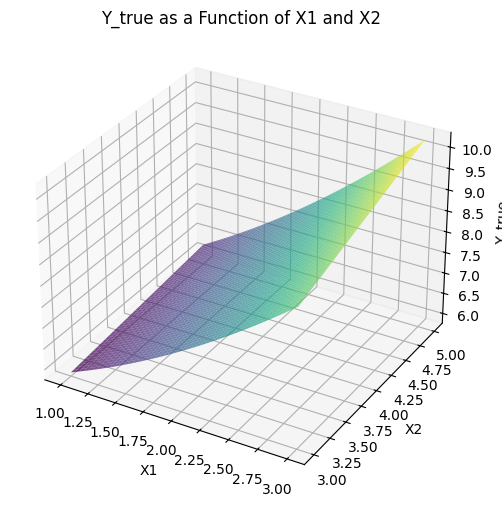

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Min-Max normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Initialize input data and true labels
X1 = np.array([1, 2, 3])
X2 = np.array([3, 4, 5])
# Generate Y_true using the specified function
def generate_y_true(X1, X2):
    return 0.25 * X1**2 + 0.2 * X1 * X2 + 5
Y_true = generate_y_true(X1, X2)
## Plot model of Y_true Generate data points for the 3D plot
X1_plot = np.linspace(np.min(X1), np.max(X1), 100)
X2_plot = np.linspace(np.min(X2), np.max(X2), 100)
X1_plot, X2_plot = np.meshgrid(X1_plot, X2_plot)
Y_true_plot = generate_y_true(X1_plot, X2_plot)

# Plotting Y_true as a function of X1 and X2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_plot, X2_plot, Y_true_plot, cmap='viridis', alpha=0.7)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y_true')
ax.set_title('Y_true as a Function of X1 and X2')

plt.show()



# Normalize inputs and outputs
X1_normalized = normalize(X1)
X2_normalized = normalize(X2)
Y_true_normalized = normalize(Y_true)

# Initialize weights and biases
np.random.seed(42)
W11, W21, W12, W22 = 2 * np.random.rand(4) - 1
W31, W41, W32, W42 = 2 * np.random.rand(4) - 1
W51, W52 = 2 * np.random.rand(2) - 1
b1, b2, b3, b4 = 2 * np.random.rand(4) - 1

# Hyperparameters
learning_rate = 0.1
epochs = 10000

# Lists to store weights for visualization
weights = [W11, W21, W12, W22, W31, W41, W32, W42, W51, W52]
biases = [b1, b2, b3, b4]

# Lists to store weight and bias histories for visualization
weights_history = [[] for _ in range(len(weights))]
biases_history = [[] for _ in range(len(biases))]

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)
rmse_history = []

In [39]:
    A11 = sigmoid(X1_normalized * W11 + X2_normalized * W12 + b1)
    A12 = sigmoid(X1_normalized * W21 + X2_normalized * W22 + b2)
    A21 = sigmoid(A11 * W31 + A12 * W32 + b3)
    A22 = sigmoid(A11 * W41 + A12 * W42 + b4)
    Y_pred = A21 * W51 + A22 *W52

    # Calculate the loss
    loss = np.mean((Y_pred - Y_true_normalized)**2)

In [40]:
loss

0.20464241147532877

In [41]:
Y_pred

array([0.27626585, 0.27698857, 0.27679423])

In [42]:
Y_true_normalized

array([0.        , 0.39772727, 1.        ])

In [43]:

    # Backward pass
    d_loss = (Y_pred - Y_true_normalized) / len(Y_true_normalized)
    d_W51 = A21 * d_loss
    d_W52 = A22 * d_loss

    d_A21 = W51 * d_loss
    d_A22 = W52 * d_loss

    d_A11 = W31 * sigmoid_derivative(A11) * d_A21
    d_A12 = W41 * sigmoid_derivative(A12) * d_A21

    d_W11 = X1_normalized * sigmoid_derivative(A11) * d_A11
    d_W21 = X2_normalized * sigmoid_derivative(A11) * d_A11
    d_b1 = sigmoid_derivative(A11) * d_A11

    d_W12 = X1_normalized * sigmoid_derivative(A12) * d_A12
    d_W22 = X2_normalized * sigmoid_derivative(A12) * d_A12
    d_b2 = sigmoid_derivative(A12) * d_A12

    d_W31 = A11 * sigmoid_derivative(A21) * d_A21
    d_W41 = A12 * sigmoid_derivative(A21) * d_A21
    d_b3 = sigmoid_derivative(A21) * d_A21

    d_W32 = A11 * sigmoid_derivative(A22) * d_A22
    d_W42 = A12 * sigmoid_derivative(A22) * d_A22
    d_b4 = sigmoid_derivative(A22) * d_A22



In [47]:
d_loss = (Y_pred - Y_true_normalized) / len(Y_true_normalized)
d_loss

array([ 0.09208862, -0.04024623, -0.24106859])

In [51]:
Y_pred - Y_true_normalized

array([ 0.27626585, -0.1207387 , -0.72320577])

In [52]:
Y_pred

array([0.27626585, 0.27698857, 0.27679423])

In [50]:
Y_true_normalized

array([0.        , 0.39772727, 1.        ])

In [53]:
0.27679-1

-0.72321

In [54]:
A21

array([0.45976486, 0.43488402, 0.41618184])

In [55]:
d_W51

array([ 0.04233911, -0.01750244, -0.10032837])

In [56]:
((0.276-0)*0.46+(0.276-0.397)*0.43+(0.276-1)*0.416)*(1/3)

-0.07541799999999997

In [57]:
np.mean(d_W51)

-0.025163900982049615

In [58]:

    # Calculate the loss
    loss = (1/2)*np.mean((Y_pred - Y_true_normalized)**2)

    # Backward pass
    d_loss = (Y_pred - Y_true_normalized) / len(Y_true_normalized)
    d_W51 = A21 * d_loss
    d_W52 = A22 * d_loss

    d_A21 = W51 * d_loss
    d_A22 = W52 * d_loss

In [61]:
np.sum(d_W52)

-0.08931141645141766

In [62]:
A22

array([0.44044149, 0.45426928, 0.46289082])